# Pymaceuticals Inc.

## Analysis



In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

merged_df = pd.merge(mouse_metadata, study_results, on='Mouse ID', how='outer')

merged_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
# .value_counts() provides a list of unique mouse IDs
# .count() counts the number of rows in the data (i.e. the total number of mice)
merged_df['Mouse ID'].value_counts().count()

249

In [3]:
# Identifies which mouse ID has been duplicated in this Data Frame
duplicate_df = merged_df[merged_df.duplicated(keep= False)]
duplicate_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.0,0
909,g989,Propriva,Female,21,26,0,45.0,0


In [4]:
# Returns a Data Frame with mouse ID g989 removed
cleaned_df = merged_df.drop(merged_df[merged_df['Mouse ID'] == 'g989'].index)
cleaned_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [5]:
# Checks the number of mice in the new cleaned DataFrame
cleaned_df['Mouse ID'].value_counts().count()

248

# Summary Statistics

In [6]:
# Creates a Data Frame with only the drug regimen and tumor volume values
tumor_df = cleaned_df[['Drug Regimen', 'Tumor Volume (mm3)']]

# Calculates the summary data for the tumor volume values and renames the columns so that our
# summary Data Frame is easier to read
tumor_mean = tumor_df.groupby('Drug Regimen').mean().rename(columns={'Tumor Volume (mm3)':'Mean Tumor Volume'})
tumor_median = tumor_df.groupby('Drug Regimen').median().rename(columns={'Tumor Volume (mm3)':'Median Tumor Volume'})
tumor_variance = tumor_df.groupby('Drug Regimen').var().rename(columns={'Tumor Volume (mm3)':'Tumor Volume Variance'})
tumor_std_dev = tumor_df.groupby('Drug Regimen').std().rename(columns={'Tumor Volume (mm3)':'Tumor Volume Std. Dev.'})
tumor_sem = tumor_df.groupby('Drug Regimen').sem().rename(columns={'Tumor Volume (mm3)':'Tumor Volume Std. Err.'})

# Combines all of our previous calculations into a single Data Frame
stat_summary_df = pd.concat([tumor_mean, tumor_median, tumor_variance, tumor_std_dev, tumor_sem],
                            axis = 1)

stat_summary_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


# Bar and Pie Charts

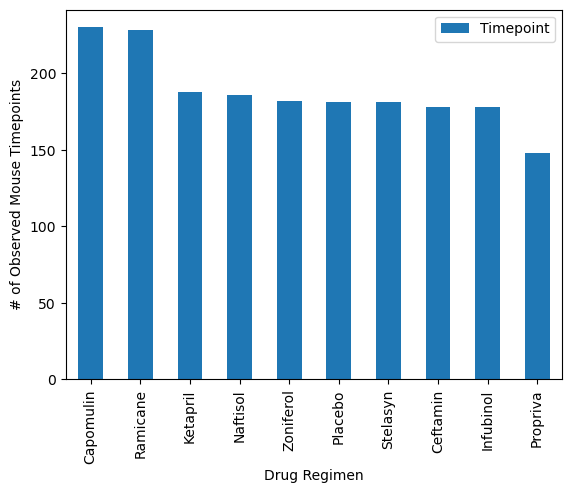

In [7]:
# Generates a bar chart chart using Pandas showing the total number of rows for each drug regimen
timepoint_count = cleaned_df.groupby('Drug Regimen').count()
timepoint_count = timepoint_count.sort_values(by=['Timepoint'], ascending=False)
pandas_bar_chart = timepoint_count.plot.bar(y='Timepoint', ylabel='# of Observed Mouse Timepoints')
plt.show()

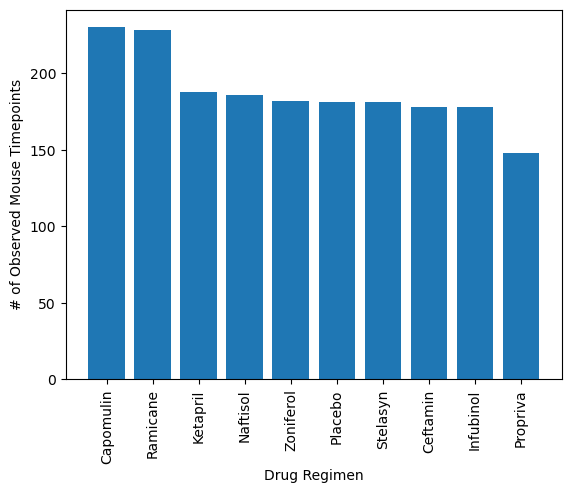

In [8]:
# Generates a bar chart chart using pyplot showing the total number of rows for each drug regimen
drug_count = cleaned_df[['Drug Regimen']].value_counts()
x_axis = np.arange(len(drug_count))
plt.bar(x_axis, height=timepoint_count['Timepoint'])
plt.xticks(np.arange(10), ['Capomulin', 'Ramicane', 'Ketapril',
                       'Naftisol', 'Zoniferol', 'Placebo',
                       'Stelasyn', 'Ceftamin', 'Infubinol',
                       'Propriva'], rotation=90)
plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')
plt.show()

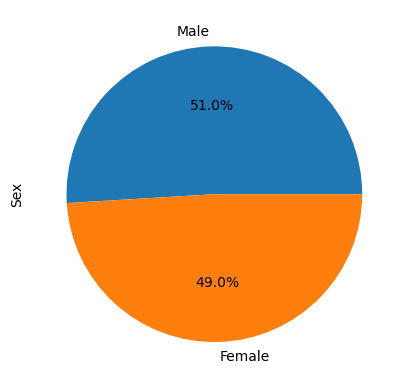

In [9]:
# Generates a pie plot using Pandas showing the distribution of female vs male mice
sex_count=cleaned_df[['Sex']].value_counts()
sex_count.plot(kind='pie', labels=['Male', 'Female'], autopct='%1.1f%%', ylabel='Sex')
plt.show()

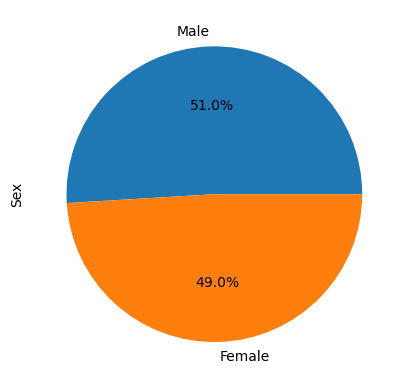

In [10]:
# Generates a pie plot using pyplot showing the distribution of female vs male mice
plt.pie(sex_count, labels=['Male', 'Female'], autopct='%1.1f%%')
plt.ylabel('Sex')
plt.show()

# Quartiles, Outliers and Boxplots

In [11]:
# Retrieves the max timepoint for each mouse ID
# Merges the resulting DataFrame to the original DataFrame
tumor_vol_df = cleaned_df.groupby(['Mouse ID'])['Timepoint'].max()
tumor_vol_df=tumor_vol_df.reset_index()
merged_data = tumor_vol_df.merge(cleaned_df, on=['Mouse ID', 'Timepoint'], how='left')
merged_data

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1
...,...,...,...,...,...,...,...,...
243,z435,10,Propriva,Female,12,26,48.710661,0
244,z578,45,Ramicane,Male,11,16,30.638696,0
245,z581,45,Infubinol,Female,24,25,62.754451,3
246,z795,45,Naftisol,Female,13,29,65.741070,3


In [12]:
# Creates a list of our desired drug regimens and an empty list to contain the tumor volumes associated with them
treatments_list = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
tumor_vol_list = []

# Loops through each treatment in our list, finds matching regimens in the Drug Regimen column, and appends that row's
# tumor volume to our empty list
for treatment in treatments_list:
    tumor_vol=merged_data.loc[merged_data['Drug Regimen']==treatment, 'Tumor Volume (mm3)']
    tumor_vol_list.append(tumor_vol)

    # Calculates the quartiles and outliers of our data
    quartiles=tumor_vol.quantile([.25, .5, .75])
    lower_quartile=quartiles[.25]
    upper_quartile=quartiles[.75]
    iqr = upper_quartile - lower_quartile 
    upper_bound = upper_quartile + (1.5*iqr)
    lower_bound = lower_quartile - (1.5*iqr)
    outliers = tumor_vol.loc[(tumor_vol<lower_bound)|(tumor_vol>upper_bound)]
    print(treatment, outliers)


Capomulin Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin Series([], Name: Tumor Volume (mm3), dtype: float64)


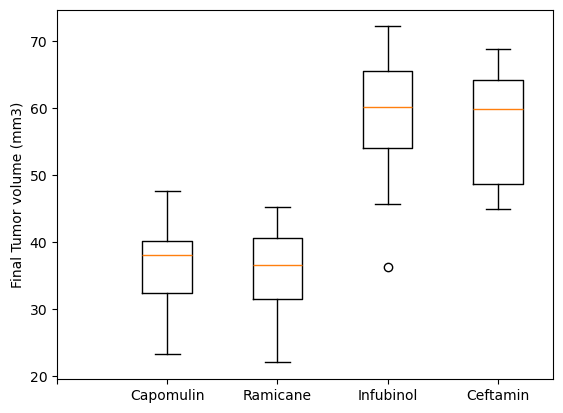

In [13]:
# Generates a box plot to show the distribution of tumor volume for each of our treatment groups
tumor_vol_y = tumor_vol_list
fig1, ax1 = plt.subplots()
ax1.set_ylabel('Final Tumor volume (mm3)')
ax1.boxplot(tumor_vol_y)
plt.xticks(ticks=np.arange(5), labels=[' ', 'Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'])
plt.show()

# Line and Scatter Plots

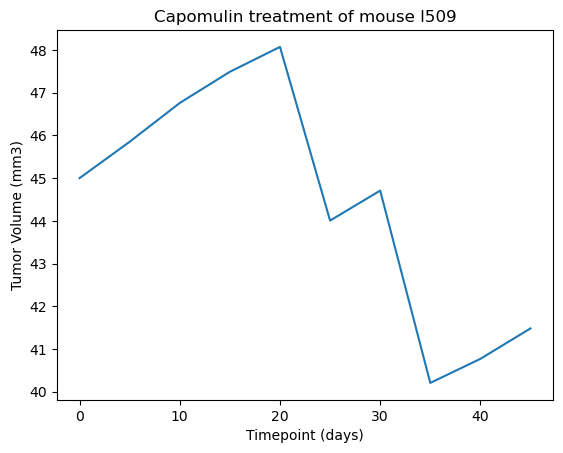

In [21]:
# Generates a line plot of tumor volume vs timepoint for one mouse treated with capomulin
cap_mouse = cleaned_df.loc[cleaned_df['Mouse ID']=='l509',:]
plt.plot(cap_mouse['Timepoint'], cap_mouse['Tumor Volume (mm3)'])
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Capomulin treatment of mouse l509')
plt.show()

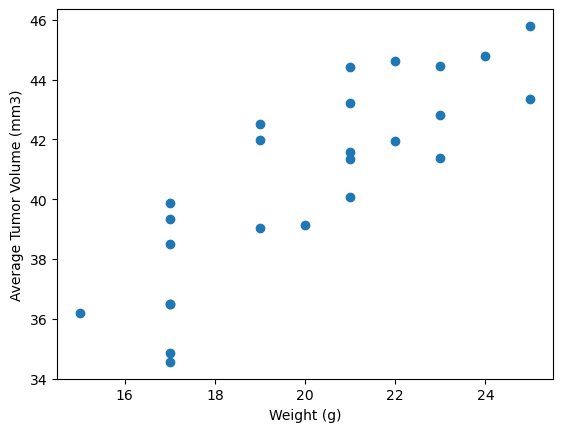

In [53]:
cap_summary = cleaned_df.loc[cleaned_df['Drug Regimen']=='Capomulin']
cap_mean_vol = cap_summary.groupby(['Mouse ID']).mean(numeric_only=True)
plt.scatter(cap_mean_vol['Weight (g)'], cap_mean_vol['Tumor Volume (mm3)'])
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()